In [1]:
from skimage import data, io, filters
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import hog 
%matplotlib inline
import numpy as np
import pandas as pd
import csv
from os import listdir
from os.path import isfile, join
import random
from sklearn.cross_validation import KFold
from sklearn.ensemble import  RandomForestClassifier
from skimage.transform import resize
from sklearn.cross_validation import train_test_split

/home/ssreehari10/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load the raw dataset, Crop and prepare x and y vectors

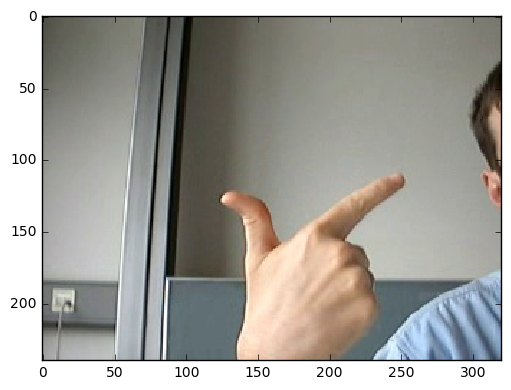

In [2]:
io.imshow('./raw/2/6_32_2_cam1_3_raw.jpg')

In [3]:
io.imshow(crop(io.imread('./raw/2/6_32_2_cam1_3_raw.jpg'),110,260,88,238))

NameError: name 'crop' is not defined

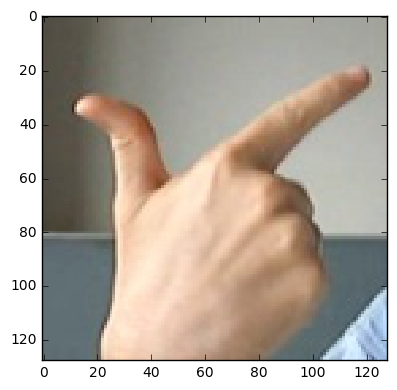

In [4]:
io.imshow('./cropped/2/6_32_2_cam1_3_crop.jpg')

In [5]:
#takes returns cropped image 
def crop(img,x1,x2,y1,y2):
    crp=img[y1:y2,x1:x2]
    crp=resize(crp,((128,128)))#resize
    return crp

In [7]:
import glob
def getfiles(folder):
    dir_files={}
    file_names=glob.glob(folder)
    for x in file_names:
        dir_files[x]=io.imread(x)
    return dir_files

In [8]:
def toCrop(d_bounds,files):
    #format x1 y1 x2 y2
    dir_cropped={}
    for x in files: #x==file_name
        y=files[x]
        x=x.split('/')[-1]
        dir_cropped[str(x)]=crop(y,int(d_bounds[x][0]),int(d_bounds[x][2]),int(d_bounds[x][1]),int(d_bounds[x][3]))
    return dir_cropped

In [9]:
def loadData(folderPatter):
    files=getfiles(folderPatter)
    dir_bounds={}
    with open("./bounding_boxes.csv","r") as f:
        i=0
        for line in csv.reader(f):
            if i==0:
                i+=1
                continue
            dir_bounds[str(line[0])]=line[1:]
    x=toCrop(dir_bounds,files)
    y={}
    for f in dir_bounds:
        y[str(f)]=int(dir_bounds[str(f)][4])
    
#    imgData['userId']=imgData[0].map(lambda x:x.strip().split('_')[0])
    return prepareHOGVectors(x,y)

In [10]:
#Check loaded data

"""
Each value in the 'x' dict is a 150x150 image described by 3rgb values per pixel

Each values in the 'y' dict is the classification label/output


print x["6_32_2_cam1_3_raw.jpg"].shape
print y["6_32_2_cam1_3_raw.jpg"]
type(x['10_31_1_cam1_3_raw.jpg'])
"""

'\nEach value in the \'x\' dict is a 150x150 image described by 3rgb values per pixel\n\nEach values in the \'y\' dict is the classification label/output\n\n\nprint x["6_32_2_cam1_3_raw.jpg"].shape\nprint y["6_32_2_cam1_3_raw.jpg"]\ntype(x[\'10_31_1_cam1_3_raw.jpg\'])\n'

### Convert to hog vectors and build the dataframe

In [11]:
def convertToGrayToHOG(imgVector):
    rgbImage = rgb2gray(imgVector)
    return hog(rgbImage)

In [12]:
def prepareHOGVectors_TRIAL(x,y):
#     imgData = pd.DataFrame(columns=['imgId', 'hogvector', 'label'])
#     tuple_number = 0
#     hogger=np.ndarray(len(imgData))
    dflist=[]
    for imgId, imgVec in x.items():
        hog=convertToGrayToHOG(imgVec)
        tmp=[]
        tmp.append(imgId)
        tmp.append(y[imgId])
        for featur in hog:
            tmp.append(featur)
        dflist.append(tmp)  
#         hog = convertToGrayToHOG(imgVec)
#         imgData.loc[tuple_number] =[imgId, hog, y[imgId]]
        
#         hogger.append(imgId)
#         for x1 in hog:
#             hogger.append(x1)
#         tuple_number += 1
    
#     return imgData,hogger
    return pd.DataFrame(dflist)

In [13]:
def prepareHOGVectors(x,y):
    dflist=[]
    for imgId, imgVec in x.items():
        hog=convertToGrayToHOG(imgVec)
        tmp={}
        if imgId[0]=='.':
            imgId=imgId.split('/')[-1]
        tmp['imgId']=imgId
        tmp['label']=y[imgId]
        tmp['userId']=int(imgId.strip().split('_')[0])
        i=1
        for featur in hog:
            tmp['h'+str(i)]=featur
            i+=1
        dflist.append(tmp)  
    return pd.DataFrame(dflist)

### Loading the data 

In [14]:
imgData=loadData("./raw/[1-5]/*")
# imgData.head(5)

In [15]:
imgData.shape

(1000, 15879)

In [16]:
# X_vector=imgData[[x for x in range(2,imgData.shape[1]-1)]]
# y_vctor=imgData[1]

In [17]:
# imgData.dtypes

### Cross Validation based on user groups 

In [24]:
num_folds = 5
num_instances = len(imgData)
seed = 7
num_trees = 500
max_features = 'auto'
# model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,min_samples_leaf=50)

In [25]:
# #df[[c for c in df if c.startswith('d')]]
# #Run a loop 5 times, with one user group being test set each time 
# j=0
# for i in range(0,5):
#     start = (4*i)+1
#     end=(4*i)+4
#     test_data=imgData[(imgData['userId']>= start) & (imgData['userId']<= end)]
#     train_data = imgData[(imgData['userId']<start ) | (imgData['userId']>end)]
#     #print test_data.shape
#     #print train_data.shape
#     rfc = model.fit(train_data.select(lambda col: col.startswith('h'), axis=1),train_data['label'])
#     print rfc.score(test_data.select(lambda col: col.startswith('h'),axis=1),test_data['label'])

In [26]:
# import pickle
# def doCV(model,imgData):
#     #df[[c for c in df if c.startswith('d')]]
#     #Run a loop 5 times, with one user group being test set each time 
#     j=0
#     bestscore=-1
#     for i in range(0,5):
#         start = (4*i)+1
#         end=(4*i)+4
#         test_data=imgData[(imgData['userId']>= start) & (imgData['userId']<= end)]
#         train_data = imgData[(imgData['userId']<start ) | (imgData['userId']>end)]
#         #print test_data.shape
#         #print train_data.shape
#         classifier = model.fit(train_data.select(lambda col: col.startswith('h'), axis=1),train_data['label'])
#         currentscore= classifier.score(test_data.select(lambda col: col.startswith('h'),axis=1),test_data['label'])
#         if bestscore 

In [30]:
import pickle
def doCV(modelname, model, imgData):
    best_score = -1
    print "Model: ", modelname
    for i in range(0,5):
        start = (4*i)+1
        end=(4*i)+4
        test_data=imgData[(imgData['userId']>= start) & (imgData['userId']<= end)]
        train_data = imgData[(imgData['userId']<start ) | (imgData['userId']>end)]
        
        classifier = model.fit(train_data.select(lambda col: col.startswith('h'), axis=1),train_data['label'])
        
        current_score = classifier.score(test_data.select(lambda col: col.startswith('h'),axis=1),test_data['label'])
        print current_score
        if current_score > best_score:
            pickle.dump(classifier, open( modelname, "wb" ) )
            best_score = current_score
    print "Best score for {0} model: {1}\n".format(modelname, best_score)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
models = [('rfc',RandomForestClassifier(n_estimators=num_trees, max_features=max_features,min_samples_leaf=50)),
         ('mnb',MultinomialNB()),
          ('svc',SVC()),
          #VotingClassifier(estimators=[('RFC',RandomForestClassifier()),('MNB',MultinomialNB),('SVC',SVC())])
         ]

for model in models:
    doCV(model[0],model[1],imgData)

Model:  rfc
0.96
0.84
0.85
0.82
0.78
Best score for rfc model: 0.96

Model:  mnb
0.955
0.86
0.88
0.77
0.795
Best score for mnb model: 0.955

Model:  svc
0.895
0.835
0.825
0.715
0.785
Best score for svc model: 0.895



In [32]:
# Try complex models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

models = [ 
            ('adaBoost', AdaBoostClassifier(n_estimators=100)),
            ('oneVsRest', OneVsRestClassifier(LinearSVC(random_state=0))),
            ('baggingClassifier', BaggingClassifier(LogisticRegression(), max_features=0.7, max_samples=0.8)),
         ]
for model in models:
    doCV(model[0],model[1],imgData)

Model:  adaBoost
0.485
0.65
0.455
0.455
0.545
Best score for adaBoost model: 0.65

Model:  oneVsRest
0.965
0.905
0.89
0.95
0.815
Best score for oneVsRest model: 0.965

Model:  baggingClassifier
0.965
0.9
0.885
0.92
0.825
Best score for baggingClassifier model: 0.965



## Random Forest with 5 cross Validation

In [ ]:
cv = KFold(imgData.shape[0], n_folds=5,shuffle=False)

In [ ]:
model = RandomForestClassifier(n_estimators=100)

In [ ]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
num_folds = 5
num_instances = len(imgData)
seed = 7
num_trees = 500
max_features = 'auto'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed,shuffle=False)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,min_samples_leaf=50)

model1 = LogisticRegression()

In [ ]:
results= cross_validation.cross_val_score(model1, X_vector, y_vctor, cv=kfold)

In [ ]:
results

In [ ]:
import random
x=[i for i in range(1,21)]
random.shuffle(x)
x

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_vctor, test_size=0.4, random_state=42)
#rfc=RandomForestClassifier.fit()

In [ ]:
model=RandomForestClassifier()
rfc=model.fit(X_train,y_train)

In [ ]:
rfc.score(X_test,y_test)

### RANDOM FOREST WITH GRID SEARCH

In [ ]:
from sklearn import grid_search


In [ ]:
gs=grid_search.GridSearchCV(model,param_grid={'n_estimators':[10,50,100]})

In [ ]:
gs.fit(X_train,y_train)

In [ ]:
gs.score(X_test,y_test)

### Use pre-cropped images ,ie. train on the same model as above

In [20]:
x_precropped=getfiles('./cropped/[1-5]/*')

In [30]:
ydict={i.split('/')[-1]:int(str(i).split('/')[3].split('_')[1])-30 for i in x_precropped.keys()}

In [34]:
x_precropped

{'./cropped/3/18_33_1_cam1_0_crop.jpg': array([[[139, 139, 131],
         [140, 140, 132],
         [141, 141, 133],
         ..., 
         [165, 168, 157],
         [164, 167, 156],
         [166, 168, 157]],
 
        [[140, 140, 132],
         [140, 140, 132],
         [140, 140, 132],
         ..., 
         [165, 168, 159],
         [165, 168, 157],
         [166, 169, 158]],
 
        [[140, 140, 132],
         [140, 140, 132],
         [140, 140, 132],
         ..., 
         [165, 168, 159],
         [165, 168, 159],
         [166, 169, 160]],
 
        ..., 
        [[149, 147, 135],
         [149, 147, 135],
         [151, 149, 137],
         ..., 
         [198, 201, 194],
         [198, 201, 194],
         [196, 199, 192]],
 
        [[149, 147, 135],
         [149, 147, 135],
         [150, 148, 136],
         ..., 
         [196, 199, 192],
         [196, 199, 192],
         [195, 198, 191]],
 
        [[145, 143, 131],
         [145, 143, 131],
         [146, 144, 132],

In [36]:
xtrn=prepareHOGVectors(x_precropped,ydict)

In [37]:
xtrn.head(2)

,h1,h10,h100,h1000,h10000,h10001,h10002,h10003,h10004,h10005,...,h9993,h9994,h9995,h9996,h9997,h9998,h9999,imgId,label,userId
0,0.020770,0.104885,0.021211,0.010824,0.098337,0.003666,0.00000,0.000000,0.0,0.0,...,0.010997,0.001548,0.000000,0.000000,0.000409,0.000321,0.008888,18_33_1_cam1_0_crop.jpg,3,18
1,0.008254,0.012425,0.003676,0.001109,0.011327,0.074848,0.05558,0.001258,0.0,0.0,...,0.009722,0.000479,0.000659,0.000926,0.002027,0.015230,0.112436,19_32_2_cam1_3_crop.jpg,2,19


In [42]:
for mole in models:
    doCV(mole,xtrn)

0.965
0.825
0.84
0.82
0.785
0.95
0.855
0.875
0.745
0.795
0.91
0.84
0.84
0.725
0.785


In [43]:
for mole in models:
    doCV(mole,imgData)

0.965
0.83
0.845
0.82
0.78
0.955
0.86
0.88
0.77
0.795
0.895
0.835
0.825
0.715
0.785


In [ ]:

X_vector1=xtrn[[x for x in range(2,imgData.shape[1])]]
y_vctor1=xtrn[1]

In [ ]:
gs.score(X_vector1,y_vctor1)

### Train fresh model on the pre-cropped image

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_vector1, y_vctor1, test_size=0.4, random_state=42)
#rfc=RandomForestClassifier.fit()

In [ ]:
gs=grid_search.GridSearchCV(model,param_grid={'n_estimators':[10,50,100]})
gs.fit(X_train1,y_train1)

In [ ]:
gs.score(X_test1,y_test1)